# Boundary Value Problem

Oleh:
1. Andree Sulistio Chandra - 1901478396
2. William - 1901460373

Untuk menyelesaikan permasalahan ini, kita membutuhkan pengetahuan tentang *initial value problem*. Pada *notebook* ini akan digunakan metode Euler untuk membantu kita menyelesaikan permasalahan ini. Selain *initial value problem*, kita juga perlu mengetahui tentang *interpolation*.

Untuk melakukan *interpolation* kita membutuhkan minimal 2 titik, $(x_1,y_1)$ dan $(x_2,y_2)$.

Maka, akan diperoleh formula sebagai berikut,

$$
x = x_1 + (y-y_1) \cdot \frac{x_2-x_1}{y_2-y_1}
$$

Di mana formula di atas dapat kita nyatakan ke dalam Python berikut:

In [1]:
def interpolate(x1,y1,x2,y2,y):
    return x1+(y-y1)*(x2-x1)/(y2-y1)

Metode yang kita gunakan sebenarnya di dalam *boundary value problem* ini bernama ** *Shooting Method.* **

Kita memanfaatkan formula di atas untuk mengetahui nilai $y'(0)$ sehingga memenuhi semua kondisi yang ada.

Karena untuk mencari $x$ membutuhkan 2 titik, kita akan minimal melakukan *Euler's method* sebanyak 3 kali.

2 metode yang dilakukan bertujuan untuk mencari $(x_1,y_1)$ dan $(x_2,y_2)$ di atas dan yang terakhir untuk menyelesaikan permasalahannya.

Untuk lebih jelasnya, kita akan langsung masuk ke dalam contoh soal.

$$\ddot y - 4 y + 4x = 0 \;;y(0)=0, \, y(1) = 2$$

Langkah pertama yang kita lakukan adalah kita mengubah permasalahan di atas menjadi bentuk *intial value problem* dengan orde-1.

Jadi, kita berdasarkan persoalan di atas, kita akan memperoleh

$
\ddot y = 4y - 4x
$.

Misalkan, $y = y_1$ dan $\dot y = y_2$.

Jika dari kedua permisalan di atas kita 'turunkan' di kedua ruas, kita akan memperoleh:

$\dot y = \dot y_1$ dan $\ddot y = \dot y_2$.

Karena kita ingin mereduksi persoalan di atas menjadi orde-1, maka kita mensubstitusikan permisalan yang ada sehingga kita akan mendapatkan dua persamaan, yaitu

$\dot y_1 = y_2$ dan $\dot y_2 = 4y_1 - 4x$

Untuk memudahkan perhitungan, kita akan mengubah bentuk yang ada menjadi bentuk vektor, sehingga bentuk umum dari permasalahan ini adalah:

$$\frac{d\vec y}{dx} = \vec f(x,\vec y) \;; \vec y(0) =  \vec C$$

di mana,
$\displaystyle \vec y = \begin{bmatrix}y_1(0) \\ y_2(0)\end{bmatrix}$ dan $\displaystyle \vec f(x,\vec y) = \begin{bmatrix} \dot y_1 \\ \dot y_2 \end{bmatrix}$.

Dari bentuk di atas, kita memperoleh

$\displaystyle \vec y = \begin{bmatrix}0 \\ \theta = 0\end{bmatrix}$ dan $\displaystyle \vec f(x,\vec y) = \begin{bmatrix} y_2 \\ 4y_1 - 4x \end{bmatrix}$.

** *Catatan* **: $\theta$ yang ada akan kita pilih secara bebas, dalam hal ini kita pilih $\theta = 0$.

Permasalahan di atas dapat dinyatakan dalam grafik tersebut, di mana kita ingin mencari fungsi $y$ yang melewati kedua titik di bawah ini

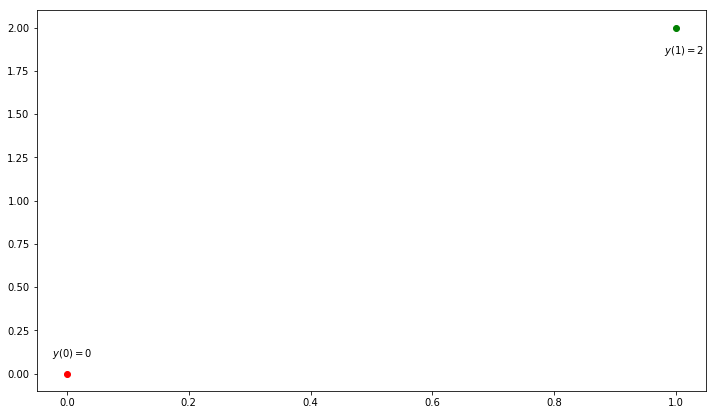

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,7))
plt.plot(0,0,'or')
plt.plot(1,2,'og')
plt.text(-0.025,0.1,'$y(0) = 0$')
plt.text(1-0.02,2-0.15,'$y(1) = 2$')
plt.show()


Setelah itu, baru kita masuk ke dalam ** *Euler's Method* ** yang sudah disesuaikan agar dapat melakukan perhitungan vektor.

** *Euler's Method* ** yang kita gunakan adalah

$$
\vec y_{i+1} = \vec y_i + \Delta x \cdot \vec f(x,\vec y)
$$.

Kemudian, kita langsung implementasikan hal-hal di atas ke dalam bentuk *Python code* berikut ini:

In [3]:
import numpy as np

def f(x,y):
    f0 = y[1]
    f1 = 4*y[0]-4*x
    f = np.array([f0,f1])
    return f

def euler(x,y,f):
    n = len(x)
    h = x[1]-x[0]
    temp = np.zeros(n)
    temp[0] = 0
    for i in range(n-1):
        y = y + h*f(x[i],y)
        temp[i+1] = y[0]
    return y, temp 

x = np.linspace(0.,1.,101)
y = np.array([0,0])

y1_a, out1 = euler(x,y,f)
print(y1_a)

[-0.77800664 -2.68863284]


Maka, untuk tebakan pertama kita, kita mendapatkan

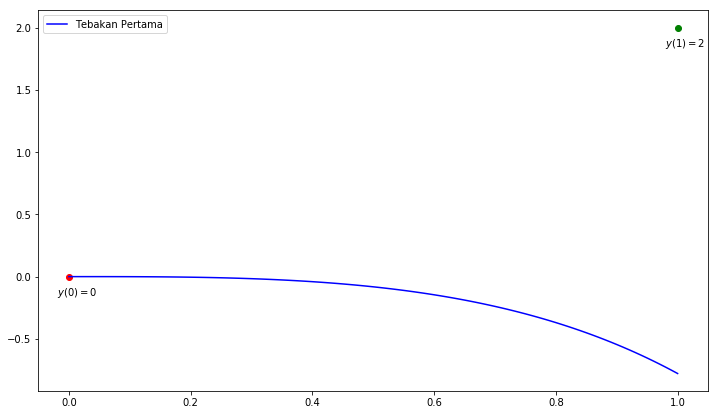

In [4]:
%matplotlib inline

plt.figure(figsize = (12,7))
plt.plot(0,0,'or')
plt.plot(1,2,'og')
plt.text(-0.02,-0.15,'$y(0) = 0$')
plt.text(1-0.02,2-0.15,'$y(1) = 2$')
plt.plot(x,out1,label='Tebakan Pertama', color='blue')
plt.legend()
plt.show()

Dapat dilihat bahwa jika kita memilih $\theta = 0$, maka kita akan mendapatkan hasil seperti di atas.

Setelah memilih $\theta = 0$, kita akan memilih $\theta = 1$, maka kita akan mendapatkan

In [5]:
y = np.array([0,1])
y2_a, out2 = euler(x,y,f)
print(y2_a)

[1. 1.]


Kemudian, kita bandingkan hasil tebakan pertama dengan tebakan kedua di atas di dalam grafik.

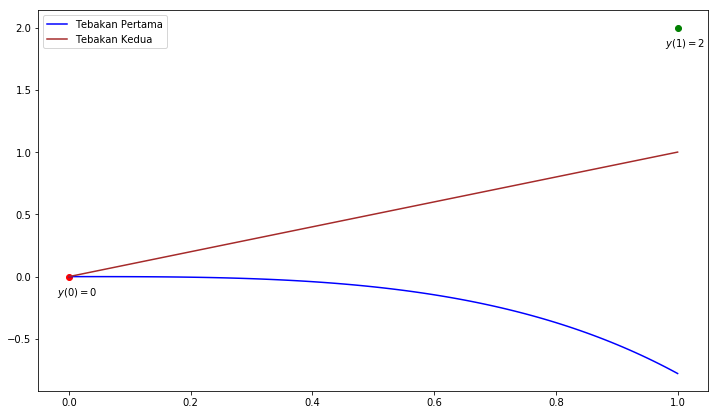

In [6]:
%matplotlib inline

plt.figure(figsize = (12,7))
plt.plot(0,0,'or')
plt.plot(1,2,'og')
plt.text(-0.02,-0.15,'$y(0) = 0$')
plt.text(1-0.02,2-0.15,'$y(1) = 2$')
plt.plot(x,out1,label='Tebakan Pertama',color='blue')
plt.plot(x,out2,label='Tebakan Kedua',color='brown')
plt.legend()
plt.show()

Lalu, kita masuk ke dalam *Shooting method*. Kita akan mengambil elemen pertama dari ```y1_a``` dan ```y2_a``` atau dengan kata lain ```y1_a[0]``` dan ```y2_a[0]```.

In [7]:
x1 = 0
y1 = y1_a[0]

x2 = 1
y2 = y2_a[0]

y_f = 2 #diambil dari y(1)

y_int = interpolate(x1,y1,x2,y2,y_f)

print(y_int)

1.5624275956970026


Terakhir, kita akan menggunakan ```y_int``` ke dalam *Euler's Method*. Maka,

In [8]:
y = np.array([0,y_int]) 
out_a, out = euler(x,y,f)
print(out_a)

[2.        3.0745889]


Maka, hasil akhir dari *Shooting method* yang dilakukan dapat dinyatakan di dalam grafik berikut

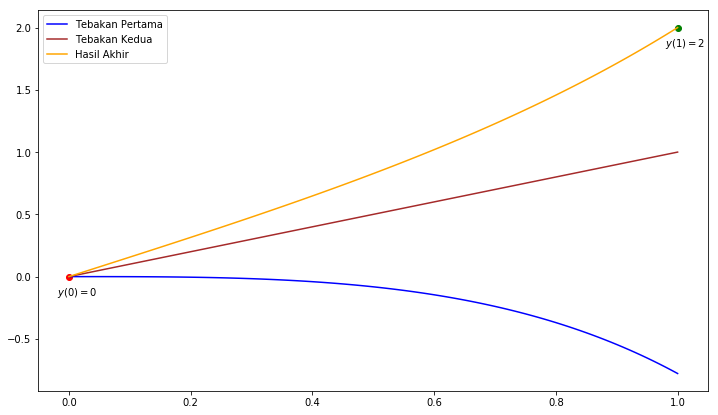

In [9]:
%matplotlib inline

plt.figure(figsize = (12,7))
plt.plot(0,0,'or')
plt.plot(1,2,'og')
plt.text(-0.02,-0.15,'$y(0) = 0$')
plt.text(1-0.02,2-0.15,'$y(1) = 2$')
plt.plot(x,out1,label='Tebakan Pertama',color='blue')
plt.plot(x,out2,label='Tebakan Kedua',color='brown')
plt.plot(x,out,label='Hasil Akhir',color='orange')
plt.legend()
plt.show()

Dengan demikian, kita dapat menemukan fungsi $y$ dari persamaan diferensial yang ada.